In [1]:
from collections import Counter
import pandas as pd
import plotly.express as px
import sys

sys.path.append('..')
from config import Config
from regexes import *

In [2]:
data = []
with open("../awsw_story_input.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        if len(line) > 0:
            msg_match = re_msg.search(line)
            if msg_match is not None:
                msg_from = msg_match.group(1)
                if msg_from in Config.interactable_characters:
                    sentiment = msg_match.group(2)
                    text = msg_match.group(3)
                    data.append({
                        'dragon': msg_from,
                        'sentiment': sentiment,
                        'text': text
                    })

In [3]:
def valid_emotions_per_dragon():
    result = {}
    for d in data:
        if not d['dragon'] in result:
            result[d['dragon']] = []
        emotion = d['sentiment']
        if not emotion in result[d['dragon']]:
            result[d['dragon']].append(emotion)
    return result
valid_emotions_per_dragon()

{'Ry': ['normal', 'smile', 'shy', 'sad', 'look', 'angry', 'face', 'think'],
 'Lo': ['shy', 'happy', 'normal', 'relieved', 'think', 'sad'],
 'Ip': ['happy', 'think', 'normal', 'sad'],
 'Br': ['normal',
  'stern',
  'smirk',
  'brow',
  'laugh',
  'flirty',
  'gunself',
  'angry',
  'shy',
  'sad'],
 'An': ['normal',
  'sad',
  'face',
  'disgust',
  'rage',
  'smirk',
  'cry',
  'despair',
  'think'],
 'Mv': ['scared',
  'normal',
  'angry',
  'nice',
  'sad',
  'think',
  'rage',
  'laugh',
  'annoyed',
  'smile',
  'shy',
  'sideeye'],
 'Ad': ['think',
  'normal',
  'giggle',
  'annoyed',
  'disappoint',
  'sad',
  'frustrated'],
 'Em': ['mean', 'frown', 'normal', 'ques', 'laugh', 'stern'],
 'Sb': ['normal',
  'drop',
  'disapproval',
  'brow',
  'stern',
  'smile',
  'shy',
  'hand'],
 'Dm': ['arrogant', 'face', 'normal'],
 'Ka': ['normal', 'exhausted', 'smile', 'excited', 'ques'],
 'Rz': ['angry',
  'annoyed',
  'gunpoint',
  'normal',
  'amused',
  'gunself',
  'rage',
  'defeat',


In [4]:
sentiment_counter = Counter()
for d in data:
    sentiment_counter[d['sentiment']] += 1
df = pd.DataFrame.from_dict(sentiment_counter, orient='index').reset_index()
fig = px.pie(df, values=0, names='index', title='Frequency of sentiment/emotions in AWSW')
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor="White",
    height=900
)
fig.show()

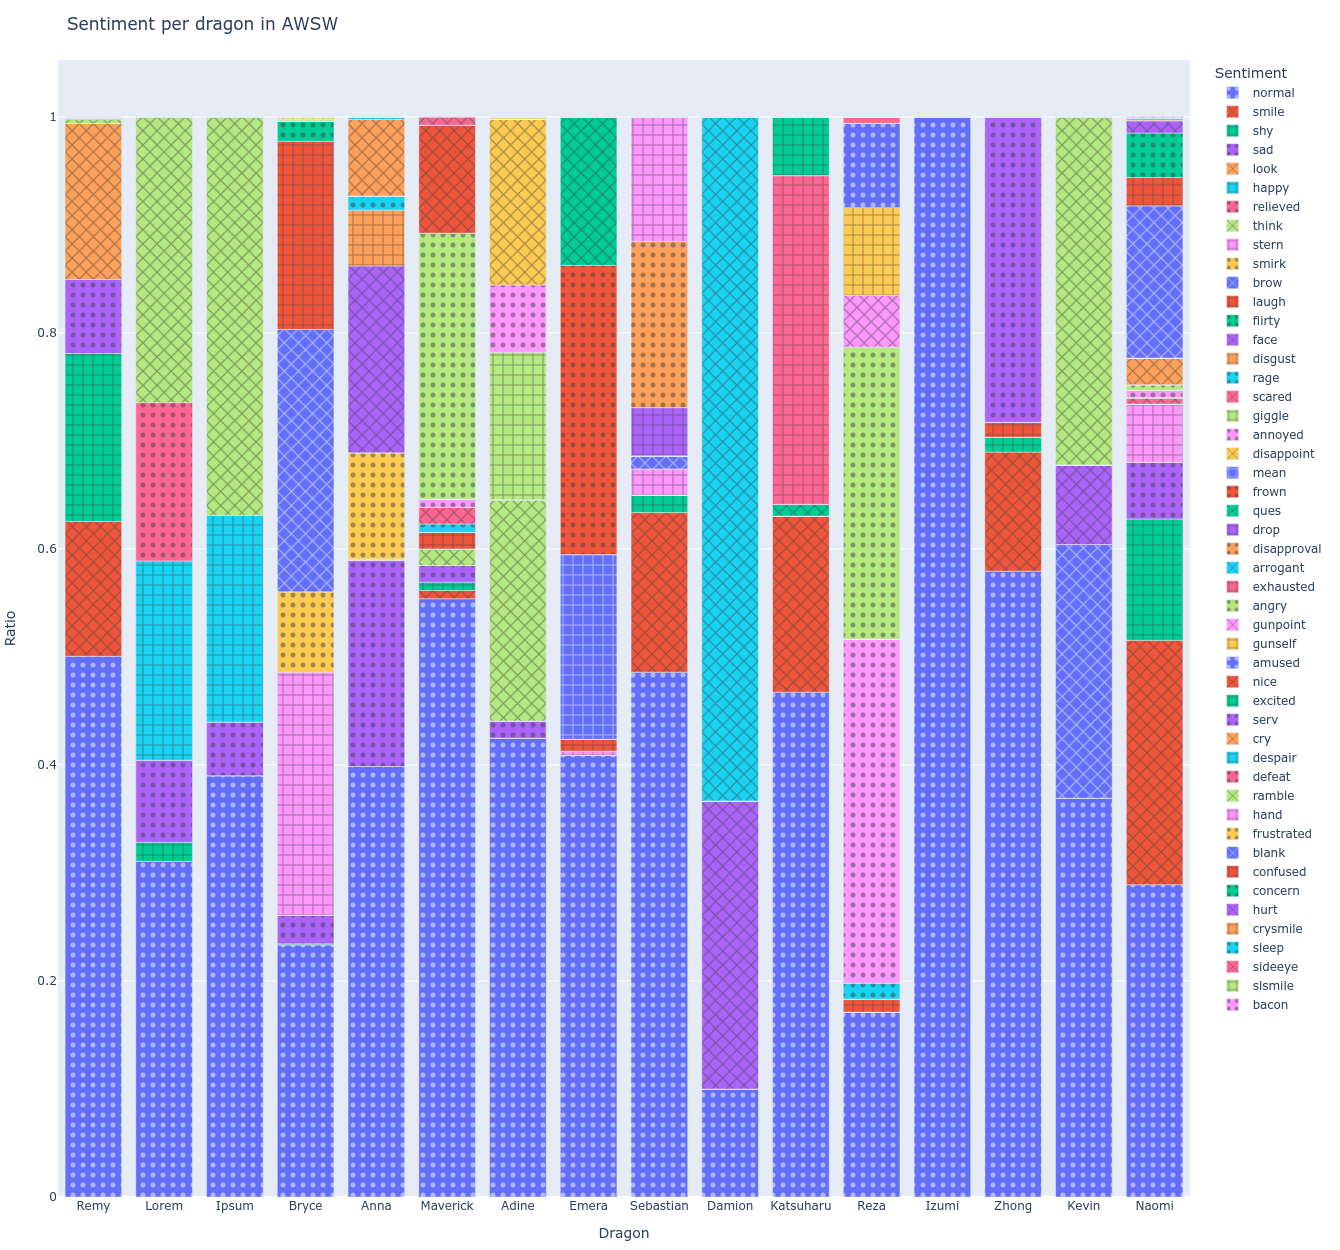

In [5]:
counter_for_dragons = {}
for d in data:
    if not d['dragon'] in counter_for_dragons:
        counter_for_dragons[d['dragon']] = Counter()
    counter_for_dragons[d['dragon']][d['sentiment']] += 1
final_counter = {
    'Dragon': []
}
for dragon in counter_for_dragons:
    final_counter['Dragon'].append(Config.interactable_characters[dragon])
    
for sentiment in sentiment_counter:
    final_counter[sentiment] = []
    for dragon in counter_for_dragons:
        count = counter_for_dragons[dragon][sentiment]
        final_counter[sentiment].append(count)
        
for i in range(len(final_counter['Dragon'])):
    max_sentiment_count = 0
    for sentiment in sentiment_counter:
        max_sentiment_count += final_counter[sentiment][i]
    for sentiment in sentiment_counter:
        final_counter[sentiment][i] /= max_sentiment_count
        
df = pd.DataFrame(data = final_counter)
fig = px.bar(df, x="Dragon", y = list(sentiment_counter.keys()), title="Sentiment per dragon in AWSW", pattern_shape="variable", pattern_shape_sequence=[".", "x", "+"], labels={"value": "Ratio", "variable": "Sentiment"})
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor="White",
    height=1250
)
fig.show()